In [17]:
import pandas as pd
import json

with open('response.json', 'rb') as f:
    data = json.load(f)


In [18]:
import geopandas as gpd

gdf = gpd.GeoDataFrame.from_features(eval(data['gdfs']['Инженер по качеству']['house_points']), crs=4326)
gdf.head(3)


geometry  avg_m2_price_rent  price  P_clinic  P_hospitals  \
0  POINT (30.27775 59.93840)         883.362808  45554         1            1   
1  POINT (30.27722 59.93811)         885.362774  45554         1            1   
2  POINT (30.27417 59.94076)         913.113435  45728         1            1   

   P_kindergarten  P_mfc  P_schools  accs_time  log_accs_time     Iq  P_avg  \
0             0.0    1.0        1.0       10.0            1.0  0.494    0.8   
1             0.0    1.0        1.0       10.0            1.0  0.494    0.8   
2             0.0    1.0        1.0       10.0            1.0  0.492    0.8   

     Idx  
0  0.647  
1  0.647  
2  0.646

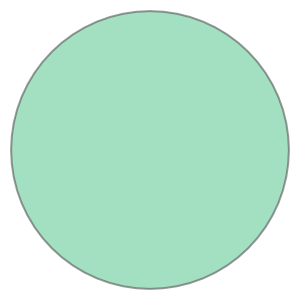

In [29]:
gdf.head(1).to_crs(3857).buffer(1e5).item()


In [60]:
gdf[gdf.to_crs(3857).intersects(gdf.head(1).to_crs(3857).buffer(10000).item())].round(3).explore(column='Idx')


In [42]:
gdf[gdf.index.isin(gdf.to_crs(3857).intersection(gdf.head(1).to_crs(3857).buffer(1).item()).index)].explore()


In [20]:
gdf.round(3).explore(column='Idx')
